In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from scipy.interpolate import interp1d
from astropy.table import Table

In [3]:
u=lvmnebular.simulation()

u.loadsim('Bubble_v2_1e-8',900)                    #native simulation  pert 0.9_0.9_Bubble_v2_1e-8
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True)     #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True)      #snbin simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/outputs/Bubble_v2_1e-8_linear_full_900_flux.fits
no.of bins: 169


In [23]:
with fits.open(u.simfile) as hdu:
    header = hdu[0].header
    wave = hdu['WAVE'].data ##1D array
    flux = hdu['TARGET'].data ##2D array(no. of fibers, wave)
    err = hdu['ERR'].data
    fiberdata = Table.read(hdu['FIBERID'])

    distance=16000 #self.pc
    rad = np.sqrt(fiberdata['x'].flatten()**2+fiberdata['y'].flatten()**2)
    r = (rad*distance*np.pi/648000) # converting arcsecs to parsec

    #sel = 
    #plt.scatter(wave, flux)
    print(r, r.shape)
    for i, j in zip(r, ):
        print('rad:', i)
    print(r.shape)

          x          
        arcsec       
---------------------
1.199807826129486e-28
     2.87009696427056
    2.870096964272317
   2.8700969613853844
    2.870096961387958
   2.8700969642722565
    2.870096964274014
    5.740193761151539
    4.971153653126411
    5.740193761153105
                  ...
    18.82047691873182
   18.820476918739303
     20.0906693760992
    18.82047644384915
   17.923742677454754
   17.458111537164527
   17.458111537163717
    17.92374267745682
    18.82047644384984
    20.09066937610232
Length = 169 rows (169,)
rad: 1.199807826129486e-28
rad: 2.87009696427056
rad: 2.870096964272317
rad: 2.8700969613853844
rad: 2.870096961387958
rad: 2.8700969642722565
rad: 2.870096964274014
rad: 5.740193761151539
rad: 4.971153653126411
rad: 5.740193761153105
rad: 4.971153668120096
rad: 4.971153668117107
rad: 5.740193738064205
rad: 5.740193738063226
rad: 4.971153668121077
rad: 4.971153668118086
rad: 5.740193761153236
rad: 4.971153653122442
rad: 5.740193761154801
rad: 

In [24]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #native sim


Fitting Emmission Lines: ['9532' '9069' '7319' '7320' '7330' '7331' '6731' '6716' '6584' '6563'
 '6548' '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970'
 '3729' '3726']
linefitfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/Bubble_v2_1e-8_linefits.fits


/tmp/ipykernel_19645/134632762.py:18: RuntimeWarning: Mean of empty slice
  TO3 = np.nanmean(TO3, axis=1)


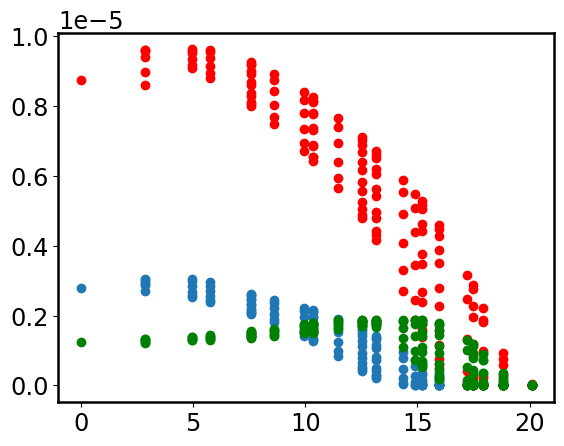

In [77]:
import pyneb as pn
O3=pn.Atom('O',3)

distance=16000 #self.pc
rad = np.sqrt(u.linefitdict['delta_ra']**2 + u.linefitdict['delta_dec']**2)
r = (rad*distance*np.pi/648000)  # converting arcsecs to parsec

TO3 = np.zeros((u.nfib, 5))


for i in range (5):

    f5007 = u.linefitdict['5007_flux']+np.random.randn(u.nfib)*u.linefitdict['5007_flux_err']
    f4363 = u.linefitdict['4363_flux']+np.random.randn(u.nfib)*u.linefitdict['4363_flux_err']

    TO3[:,i] = O3.getTemDen((f4363)/(f5007), den=120, wave1=4363, wave2=5007)

TO3 = np.nanmean(TO3, axis=1)
sel = np.isfinite(TO3)

#print(r[sel].flatten(), TO3[sel].shape, u.linefitdict['TeO3'].shape)

#plt.scatter(r[sel].flatten(), TO3[sel], color = 'red')
#plt.ylim(5000, 8000)

plt.scatter(r.flatten(), u.linefitdict['5007_flux'])
plt.scatter(r.flatten(), u.linefitdict['6563_flux'], color = 'red')
plt.scatter(r.flatten(), u.linefitdict['6584_flux'], color = 'green')

In [45]:
u.runpyneb(niter=3, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:384: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:400: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:414: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:431: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:445: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:463: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:477: RuntimeWarning: Mean of empty

In [62]:
print(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeO2']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(u.linefitdict['TeN2']), np.nanmean(u.linefitdict['neO2']), np.nanmean(u.linefitdict['neS2']))

7422.411288185454 nan 7011.60265304205 7257.529134042865 86.50503518569057 140.98930160909103


/tmp/ipykernel_19645/1413392805.py:1: RuntimeWarning: Mean of empty slice
  print(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeO2']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(u.linefitdict['TeN2']), np.nanmean(u.linefitdict['neO2']), np.nanmean(u.linefitdict['neS2']))


/home/amrita/LVM/lvmnebular/lvmnebular.py:795: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:796: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)


ADF_T0 [OIII]: 0.0032432412621549904
ADF_T0 [NII]: 0.014735022561333484


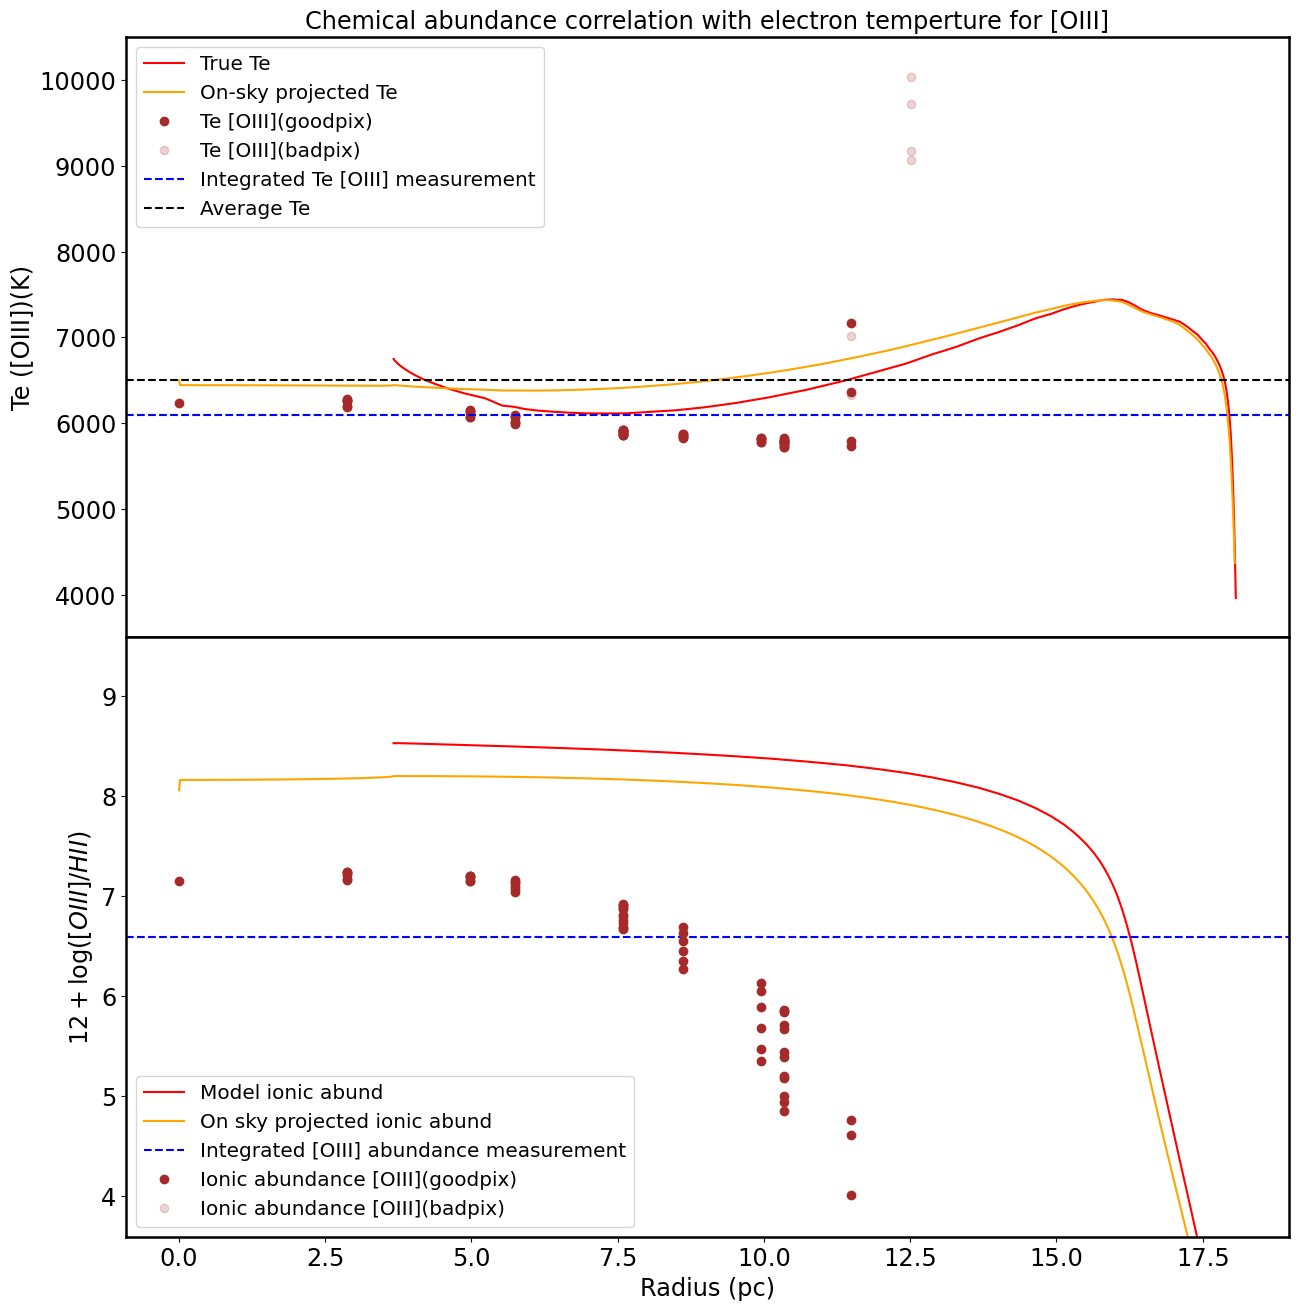

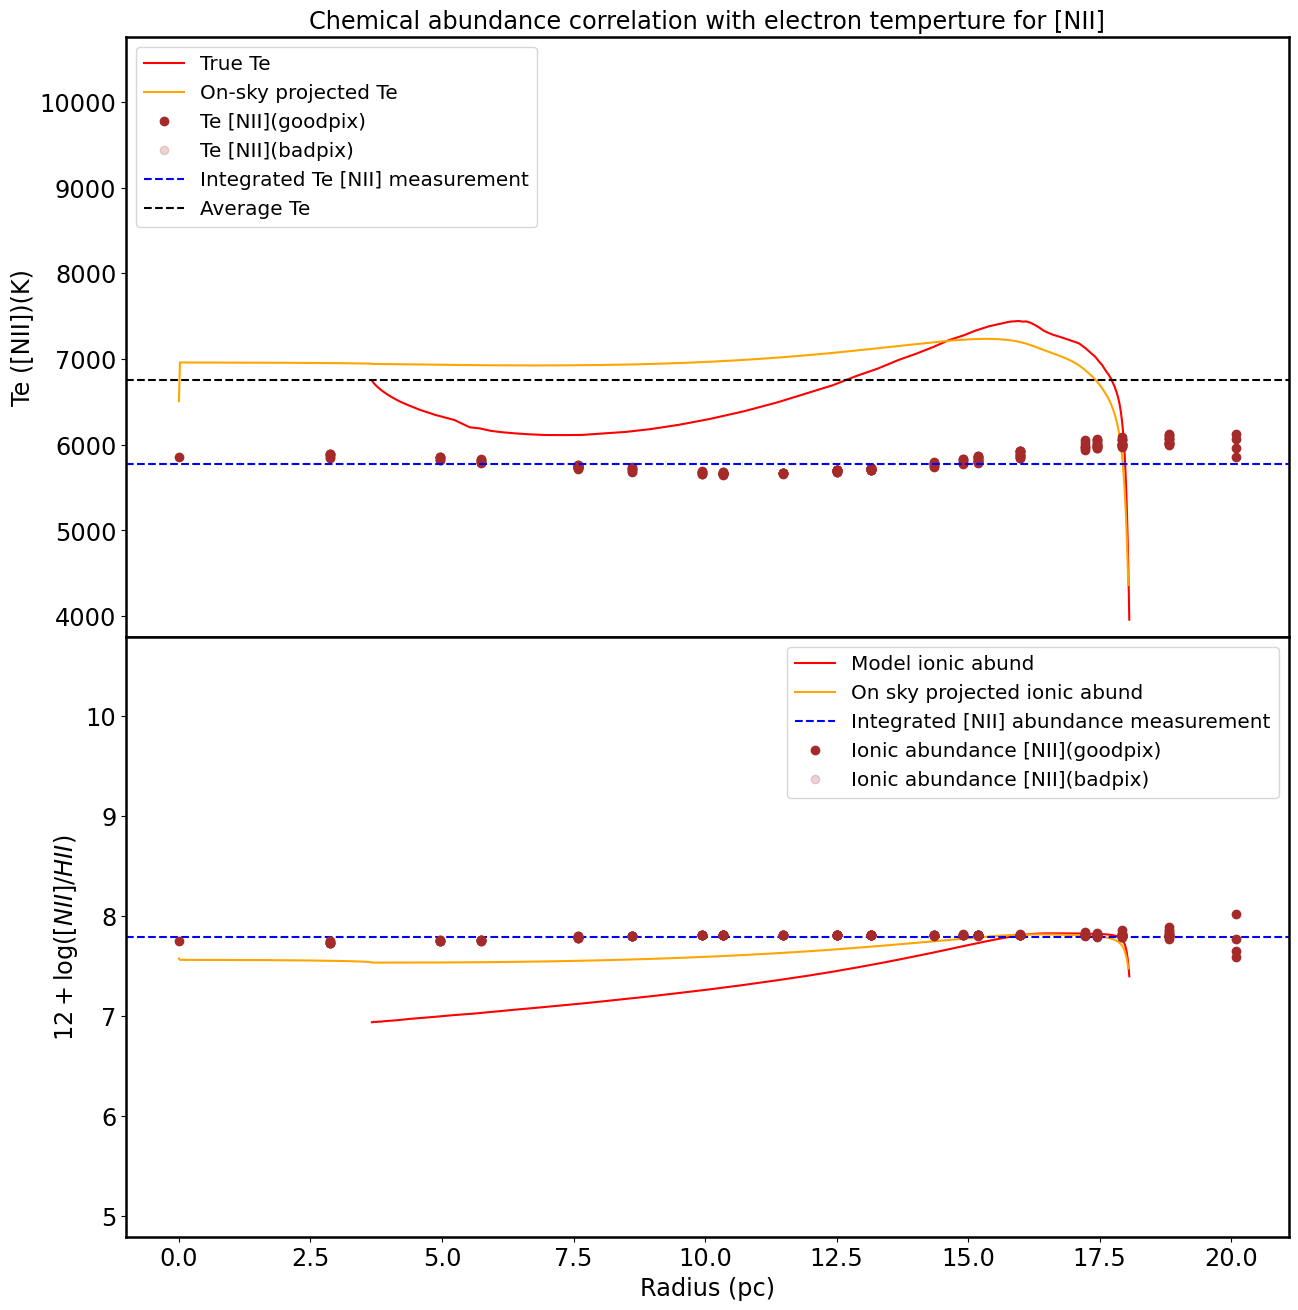

In [ ]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#rad2 =18 mostly 0r 17.8

#rad1 = ([OIII]:11.2, [OII]:11.2, [NII]:13.8, [SIII]:17.6, [SII]: 17.6) -------- z=0.5
#rad1 = ([OIII]:9.78, [OII]:9.78, [NII]:13.36, [SIII]:17.35, [SII]: 17.35) -------- z=1
#rad1 = ([OIII]:11.92, [OII]:11.92, [NII]:14.15, [SIII]:17.5, [SII]: 17.5) -------- z=0.2
#rad1 = ([OIII]:11.17, [OII]:11.17, [NII]:13.83, [SIII]:17.5, [SII]: 17.5) -------- z=0.4
#rad1 = ([OIII]:10.75, [OII]:10.75, [NII]:13.65, [SIII]:17.41, [SII]: 17.41) -------- z=0.6
#rad1 = ([OIII]:10.26, [OII]:10.26, [NII]:13.44, [SIII]:17.33, [SII]: 17.33) -------- z=0.8

#log_ion_sun = -3.31 ----[O]
#log_ion_sun = -4.17 ----[N]
#log_ion_sun = -4.88 ----[S]

z1 = 1

#[OII]
#line = 3726    
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeO2'], u.vals[5], u.int_TO2, u.int_OpH, u.OpH, u.Abund_O2,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 10, rad2 = 17.8, label = '[OII]', outfilename = 'O2_Te_chem_abund_vs_R.png')

#[OIII]
line = 4363  
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeO3'], u.vals[6], u.int_TO3, u.int_OppH, u.OppH, u.Abund_O3,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 9.78, rad2 = 18, label = '[OIII]', outfilename = 'O3_Te_chem_abund_vs_R.png')

#[SII]
#line = 6716   
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS2'], u.vals[11], u.int_TS2, u.int_SpH, u.SpH, u.Abund_S2,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.8, label = '[SII]', outfilename = 'S2_Te_chem_abund_vs_R_present.png')

##[SIII]
#line = 6312  
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS3'], u.vals[12], u.int_TS3, u.int_SppH, u.SppH, u.Abund_S3,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.5, label = '[SIII]', outfilename = 'S3_Te_chem_abund_vs_R_present.png')

##[NII]
line = 5755   
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeN2'], u.vals[8], u.int_TN2, u.int_NpH, u.NpH, u.Abund_N2,  testline = np.array(line), z = z1, log_ion_sun = -4.17, rad1 = 13.36, rad2 = 17.8, label = '[NII]', outfilename = 'N2_Te_chem_abund_vs_R_present.png')

In [ ]:
# Plot for [OIII]

In [ ]:
#Overplot profiles

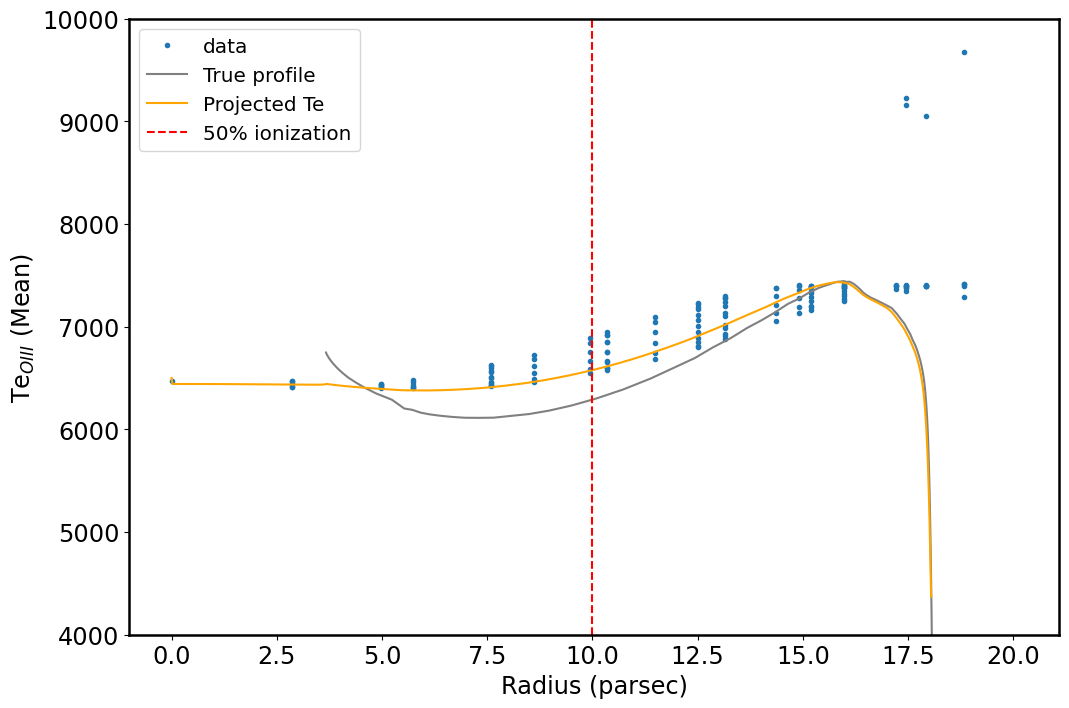

In [61]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#def overplotprofile(self, z, val1, val2, min, max, x, n, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False)

#u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, 13.8, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 8000, 17.8, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, 17.8, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],   4000, 10000, 10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 , 200,    10.0, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 , 1800,   17.8, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 10000,10.0, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

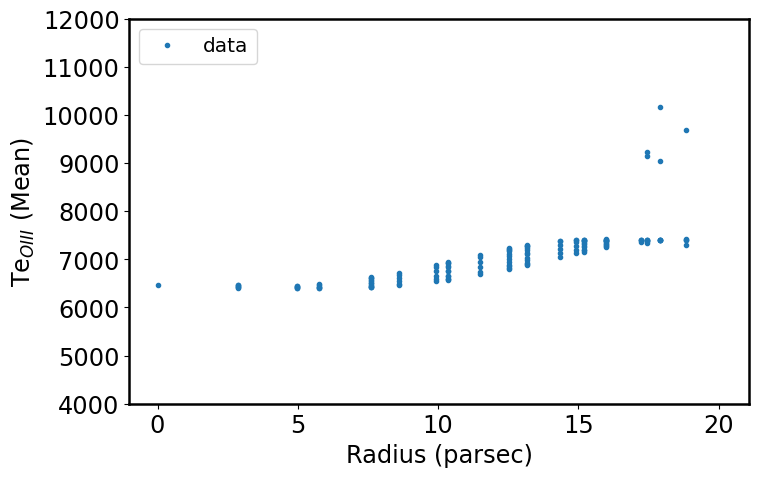

In [59]:
#MakeRadialbin plot profiles
#u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)



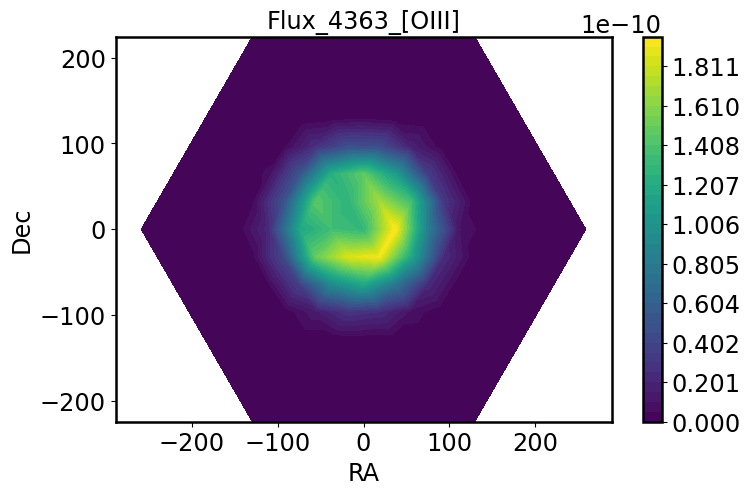

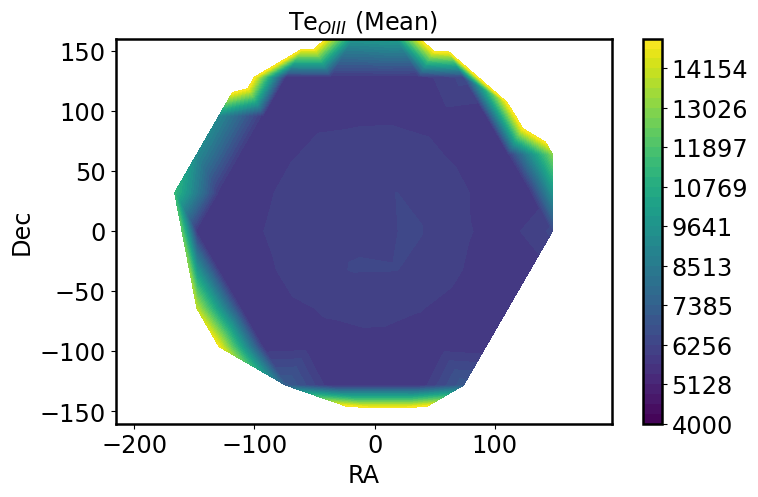

In [ ]:
#Make plot profiles
u.plotmap(u.linefitdict['4363_flux'], np.min(u.linefitdict['4363_flux']) , np.max(u.linefitdict['4363_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_4363_[OIII]', output='4363_flux',   vorbin=False)
#u.plotmap(u.linefitdict['5007_flux'], np.min(u.linefitdict['5007_flux']) , np.max(u.linefitdict['5007_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5007_[OIII]', output='5007_flux',   vorbin=False)
#u.plotmap(u.linefitdict['5755_flux'], np.min(u.linefitdict['5755_flux']) , np.max(u.linefitdict['5755_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5755_[NII]', output='5755_flux',   vorbin=False)
#u.plotmap(u.linefitdict['6312_flux'], np.min(u.linefitdict['6312_flux']) , np.max(u.linefitdict['6312_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_6312_[SIII]', output='6312_flux',   vorbin=False)
#
#u.plotmap(u.linefitdict['TeN2'], 5000 , 10000,  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{NII}$ (Mean)', output='TeN2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS2'], 5000 , 18000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SII}$ (Mean)', output='TeS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SIII}$ (Mean)', output='TeS3', vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 15000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OIII}$ (Mean)', output='TeO3', vorbin=False)
#u.plotmap(u.linefitdict['neO2'], 10 , 200,     table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{OII}$ (Mean)', output='neO2',      vorbin=False)
#u.plotmap(u.linefitdict['neS2'], 100 , 250,    table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{SII}$ (Mean)', output='neS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OII}$ (Mean)', output='TeO2',  vorbin=False)

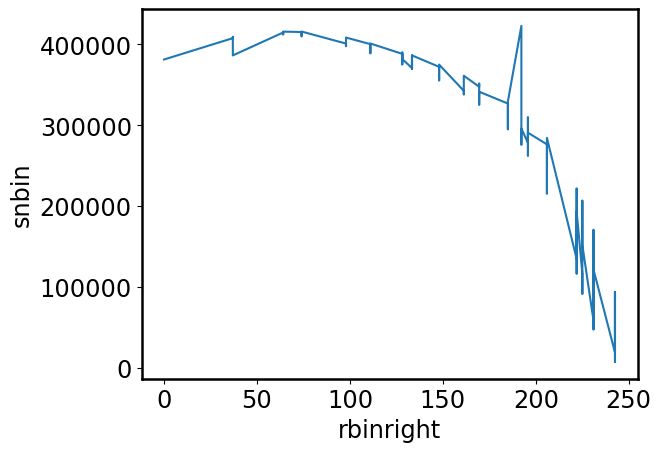

In [ ]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)

166
[[ 6.61762701e-16  1.63584068e-14 -1.60805902e-14 ... -6.90918761e-15
   3.96716166e-16  5.58384321e-15]
 [ 1.02312316e-15  1.37487449e-14  8.50637072e-15 ...  1.69329573e-15
  -8.93228769e-15  2.65308613e-15]
 [ 2.07271334e-14 -2.25597349e-14 -4.64060807e-15 ...  5.23835668e-15
  -1.80722136e-14  2.71486702e-15]
 ...
 [-4.55005127e-14  1.31724105e-15 -2.09635720e-15 ...  2.53716416e-15
   1.17064815e-14  4.44478294e-15]
 [-1.37030847e-14 -4.56756503e-15  9.61842842e-15 ... -3.41185866e-15
  -5.51403795e-15 -1.35336053e-14]
 [-4.13705820e-16  7.88744460e-15  1.16605266e-14 ...  5.92910019e-15
  -3.50272979e-16  1.05096968e-14]]


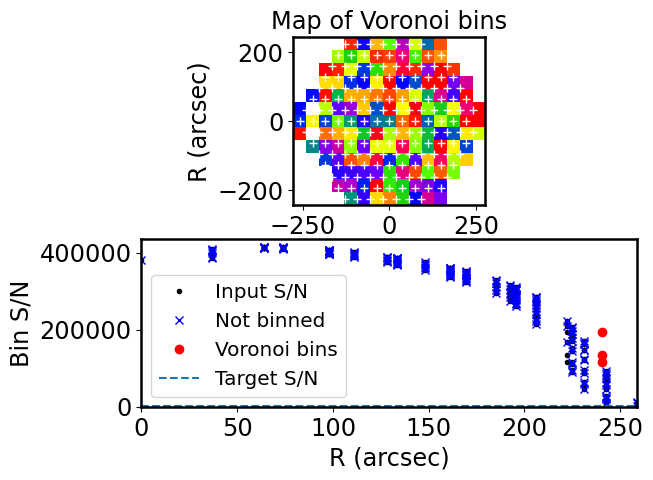

In [ ]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [ ]:
simname = 'pert_0.5_0.3_Bubble_v2_5e-14'

with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
     data=hdul[0].data

with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
    vals=hdu['Comp_0_PhysParams'].data
    e_5007 = hdu['COMP_0_FLUX_5006.84'].data
    print(np.mean(e_5007), e_5007.shape, vals[0].shape)
 
chi = 6.626e-24*299792485/5006.84

Lc = e_5007*chi/100

hdu=fits.PrimaryHDU(data = Lc)
hdu.writeto('./'+simname+'/pert_0.5_0.3_cooling_rate_cube.fits', overwrite='True')

FileNotFoundError: [Errno 2] No such file or directory: '/home/amrita/LVM/lvmnebular/pert_0.5_0.3_Bubble_v2_5e-14/testneb_tutorial3_ex1.fits'

In [ ]:
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 


R  = u.vals[0]
T0 = u.vals[1]
ne = u.vals[2]
a  = u.vals[5]

R  = R [1:]
T0 = T0[1:]
ne = ne[1:]
a  = a [1:]

cubic_interp_T0 = interp1d(R, T0, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_ne = interp1d(R, ne, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_a = interp1d(R, a, kind='cubic', axis=-1, bounds_error=False)

r0aux=rad
T0aux=cubic_interp_T0(r0aux)
aaux=cubic_interp_a(r0aux)
neaux=cubic_interp_ne(r0aux)

plt.scatter(u.linefitdict['TeN2'], (T0aux*neaux*aaux)/(neaux*aaux))

print(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux))
plt.hlines(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux), xmin = 5000, xmax = 8000, colors= 'red')
print(r0aux.shape, R.shape, T0aux.shape)

plt.xlim(5000, 8000)
#plt.ylim(6000, 8000)
plt.show()


plt.scatter(r0aux, (T0aux*neaux*aaux)/(neaux*aaux))
plt.plot(u.vals[0], u.vals[1])

plt.xlim(0, 20)
plt.ylim(5000, 8500)

In [ ]:
import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

with fits.open('./Bubble_v2_5e-14/Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data3 = hdul1[1].data

with fits.open('./pert_0.5_0.8_Bubble_v2_5e-14/pert_0.5_0.8_Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data5 = hdul1[1].data

#print(np.nanmean(data['TeO3']), np.nanmean(data1['TeO3']), rad)

plt.scatter(rad, data3['TeO3'], color = 'green')
plt.scatter(rad, data5['TeO3'], color = 'blue')
plt.plot(u.vals[0], u.vals[1])
plt.ylim(5000, 10000)

plt.show()